In [1]:
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import sklearn                     # a machine learning library
import os                          # for accessing local files
import IPython.display as ipd
import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import librosa

In [2]:
df = pd.DataFrame(columns = ['audio_file', 'spectrogram', 'mel_spectrogram', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13'])
df

,audio_file,spectrogram,mel_spectrogram,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13


In [3]:
BASE_FOLDER = "../Audio Data"
sound_file = "adish_alap_aroh_b1.wav"

In [4]:
ipd.Audio(os.path.join(BASE_FOLDER, sound_file))

In [5]:
y, sr = librosa.load(os.path.join(BASE_FOLDER, sound_file))

In [6]:
voice, _ = librosa.effects.trim(y)

In [7]:
frame_length = 1024
hop_length = 512
number_of_mfcc = 13
features = [sound_file]

In [8]:
# Short-time Fourier transform (STFT)
d_audio = np.abs(librosa.stft(voice, n_fft=frame_length, hop_length=hop_length))

## 1. Spectrogram

In [9]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
db_audio = librosa.amplitude_to_db(d_audio, ref=np.max)

In [10]:
spectrogram = np.mean(db_audio[0])
print(spectrogram)

-25.124794


In [11]:
features.append(spectrogram)

### Visualizing spectrogram

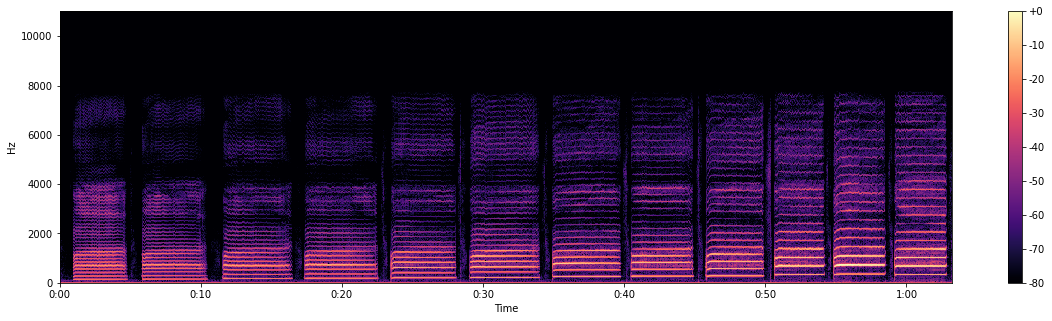

In [12]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(db_audio, sr=sr, hop_length=hop_length, x_axis="time", y_axis="linear")
plt.colorbar(format="%+2.f")

## 2. Mel Spectrogram

In [13]:
s_audio = librosa.feature.melspectrogram(voice, sr=sr)
s_db_audio = librosa.amplitude_to_db(s_audio, ref=np.max)

In [14]:
mel_spectrogram = np.mean(s_db_audio[0])
print(mel_spectrogram)

-70.25974


In [15]:
features.append(mel_spectrogram)

### Visualizing Mel Spectrogram

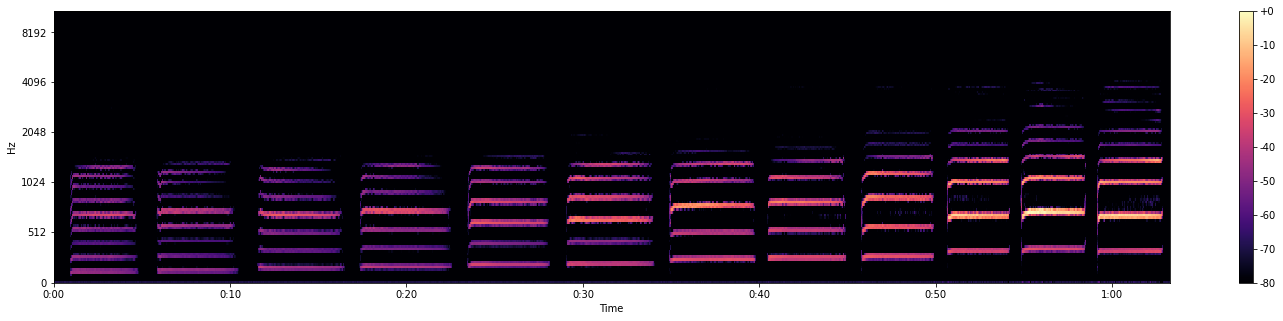

In [16]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(s_db_audio, x_axis="time",y_axis="mel", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## 3. MFCC - Mel Fequency Cepstral Coefficients


In [17]:
mfccs = librosa.feature.mfcc(voice, sr=sr, n_mfcc=number_of_mfcc)

In [18]:
mfccs.shape

(13, 2724)

In [19]:
delta = librosa.feature.delta(mfccs)

In [20]:
accelerate = librosa.feature.delta(mfccs, order=2)

In [21]:
mfcc_features = []

In [22]:
for i in range(0, number_of_mfcc):
    mfcc_value = np.mean(mfccs[i])
    mfcc_features.append(mfcc_value)

#         # mfcc delta coefficient
#         key_name = "".join(['mfcc_delta_', str(i)])
#         mfcc_value = np.mean(delta[i])
#         mfcc_features.update({key_name: mfcc_value})

#         # mfcc accelerate coefficient
#         key_name = "".join(['mfcc_accelerate_', str(i)])
#         mfcc_value = np.mean(accelerate[i])
#         mfcc_features.update({key_name: mfcc_value})

In [23]:
mfcc_features

[-281.50113,
 102.53441,
 -24.588032,
 -5.570456,
 -30.681055,
 6.084927,
 3.497632,
 5.5900974,
 -3.974662,
 12.138986,
 7.4115267,
 -3.304466,
 13.846343]

### Visualizing MFCC

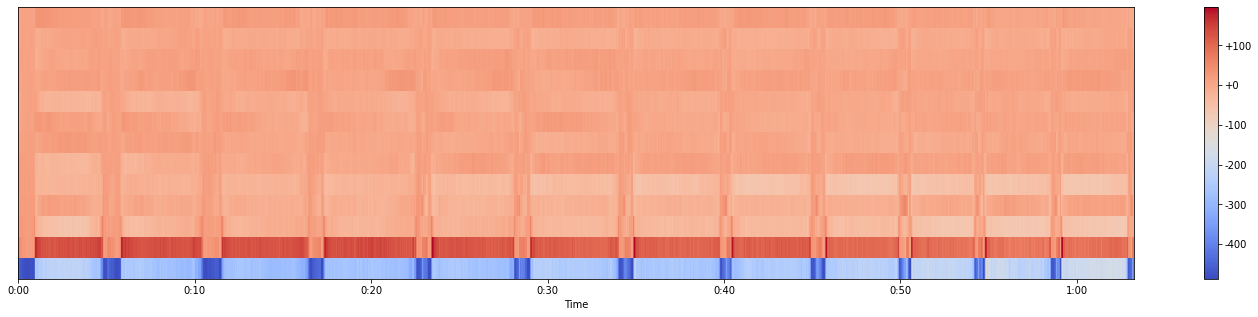

In [24]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format="%+2.f")
plt.show()

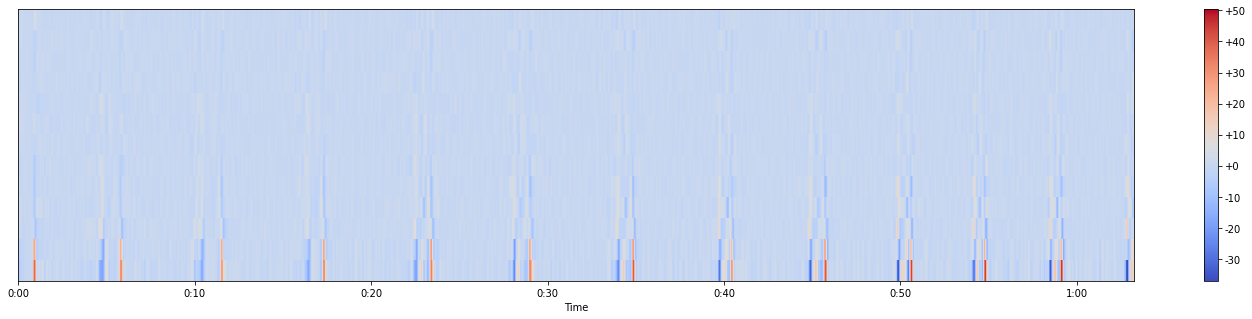

In [25]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(delta, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

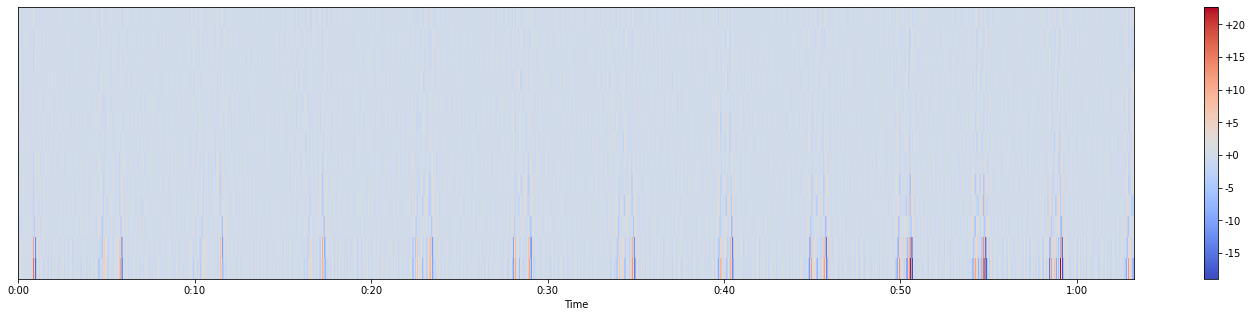

In [26]:
plt.figure(figsize=(25, 5))
librosa.display.specshow(accelerate, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [27]:
features = features + mfcc_features 

In [28]:
features
print(len(features))

16


In [29]:
df.loc[len(df)] = features

In [30]:
df

,audio_file,spectrogram,mel_spectrogram,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,adish_alap_aroh_b1.wav,-25.124794,-70.259743,-281.501129,102.534409,-24.588032,-5.570456,-30.681055,6.084927,3.497632,5.590097,-3.974662,12.138986,7.411527,-3.304466,13.846343
